# **Importar Librerias Necesarias**

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.naive_bayes

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectFromModel

In [2]:
!pip install pandas-profiling  sweetviz

     |████████████████████████████████| 15.1 MB 7.7 MB/s 


---


---
#<center> **Introducción Conjunto de Datos a Trabajar**</center>
---


---



*Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11% del total de muertes.*


*Utilizaremos un conjunto de datos para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.*


---


---
#<center> **Preprocesamiento de los Datos**</center>
---


---



En este sección se realizará la importación de los datos, la visualización de valores perdidos y la extracción de campos. En el conjunto de datos actual, hay 12 campos. A continuación se proporciona una breve información sobre dichos campos:

\

1.   **id:** Identificador único.
2.   **gender:** Genero ("Masculino", "Femenino" u "Otro").
3.   **age:** Edad de la persona.
4.   **hypertension:** 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión.
5.   **heart_disease:** 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca.
6.   **ever_married:** Si alguna vez se caso ("No" o "Yes").
7.   **work_type:** Tipo de trabajo ("children", "Govt_jov", "Never_worked", "Privado" o "Independiente").
8.   **Residence_type:** Tipo de residencia ("Rural" o "Urbano").
9.   **avg_glucose_level:** Nivel promedio de glucosa en sangre.
10.   **bmi:** Índice de masa corporal.
11.   **smoking_status:** Persona ha fumado ("anteriormente fumó", "nunca fumó", "fuma"o "Desconocido").
12.   **stroke:** 1 Si el paciente tuvo un accidente cerebrovascular o 0 si no.








# **Importar Conjunto de Datos**

In [4]:
df = pd.read_csv("AccidentesCerebroVasculares.csv");

df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,3352,Male,78.0,1,0,Yes,Self-employed,Urban,93.13,NaN,formerly smoked,1
1,1845,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
2,18587,Female,76.0,0,0,No,Private,Urban,89.96,NaN,Unknown,1
3,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1
4,2346,Male,58.0,0,0,Yes,Private,Urban,82.30,NaN,smokes,1
5,16590,Male,71.0,0,1,Yes,Private,Urban,81.76,NaN,smokes,1
6,8003,Female,77.0,0,0,No,Private,Urban,81.32,NaN,Unknown,1
7,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
8,15102,Male,78.0,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1
9,43364,Male,79.0,1,0,Yes,Private,Rural,75.02,NaN,never smoked,1


# **Explorar Conjunto de Datos**

### **Tipo de Datos**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7112 non-null   int64  
 1   gender             7112 non-null   object 
 2   age                7112 non-null   float64
 3   hypertension       7112 non-null   int64  
 4   heart_disease      7112 non-null   int64  
 5   ever_married       7112 non-null   object 
 6   work_type          7112 non-null   object 
 7   Residence_type     7112 non-null   object 
 8   avg_glucose_level  7112 non-null   float64
 9   bmi                6911 non-null   float64
 10  smoking_status     7112 non-null   object 
 11  stroke             7112 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 666.9+ KB


### **Estadísticas de Datos Numéricos y Categóricos**

In [7]:
df.describe(exclude = 'object')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,7112.000000,7112.000000,7112.000000,7112.000000,7112.000000,6911.000000,7112.000000
mean,36048.192773,50.177868,0.351519,0.320304,146.866652,32.855513,0.316507
std,19487.600966,23.246778,0.477478,0.466626,75.788061,9.365515,0.465146
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,19626.750000,34.000000,0.000000,0.000000,82.662500,25.500000,0.000000
50%,36203.500000,53.000000,0.000000,0.000000,108.010000,32.000000,0.000000
75%,51958.250000,69.000000,1.000000,1.000000,236.585000,40.136500,1.000000
max,72940.000000,90.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.describe(exclude = ['float', 'int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,7112,7112,7112,7112,7112
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,smokes
freq,3965,5355,4927,4598,2791


### **Información Inicial Sobre el Conjunto de Datos**



1.   Datos faltantes en la columna bmi (Índice de Masa Muscular).
2.   Tanto las características categóricas como las numéricas están presentes:
  *   **Características categóricas:** gender, ever_married, work_type, Residence_type, smoking_status.
  *   **Funciones numéricas binarias:** hypertension, heart_disease, stroke.
  *   **Características numéricas continuas:** age, avg_glucose_level, bmi.
3.   La mayoría de los datos son categóricos que necesitan una atención especial para visualizarlos.
4.   La extracción de características se puede realizar agrupando las características continuas (age, avg_glucose_level y bmi) y manteniendo todo lo demás.

### **Información de Datos Nulos o Faltantes**

In [9]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Solo el atributo bmi tiene algunos datos faltantes, que se eliminaran de la misma columna.

In [10]:
df.dropna(subset=['bmi'], inplace=True)

Tener en cuenta esta parte para saber como se deber trata los valores nulos del campo bmi

### **Eliminación de columnas innecesarias**

In [11]:
df.drop('id', axis=1, inplace=True)

### **Eliminación de filas innecesarias**

Se eliminara el registro Other de la columna gender, ya que no representa a que tipo de sexo pertenece y adicional solo se encuentra presente una vez en el conjunto de datos

In [12]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)

### **Estandarización nombre de columnas**

In [13]:
df.rename(columns={'Residence_type':'residence_type'}, inplace=True)

###**Información de Datos Desconocidos**

"Unknown" en *smoking_status* significa que la información no está disponible para ese paciente, por lo cual esos valores se distribuiran de acuerdo a la información análizada en el conjunto de datos

Tener en cuenta esta parte para saber como se debe trata el valor Unknown

In [14]:
stroke0 = (df['stroke'] == 0) & (df['smoking_status'] == 'Unknown')
df.loc[stroke0, 'smoking_status'] = 'never smoked'

stroke1 = (df['stroke'] == 1) & (df['smoking_status'] == 'Unknown')
df.loc[stroke1, 'smoking_status'] = 'formerly smoked'

---


---
#<center> **Visualización y Distribución de los Datos**</center>
---


---


###**Visualización Descriptiva del Conjunto de Datos**



                                             |          | [  0%]   00:00 -> (? left)


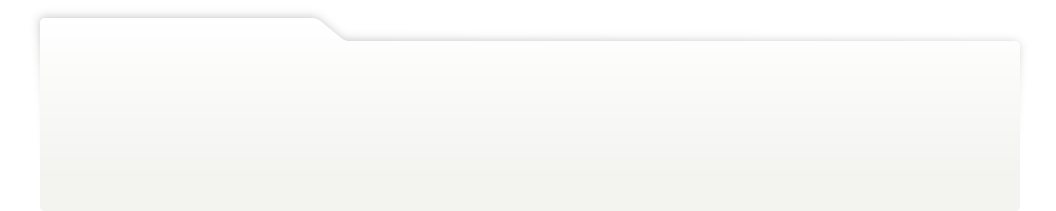
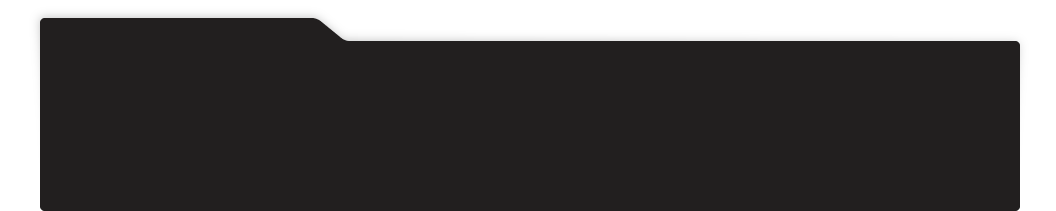
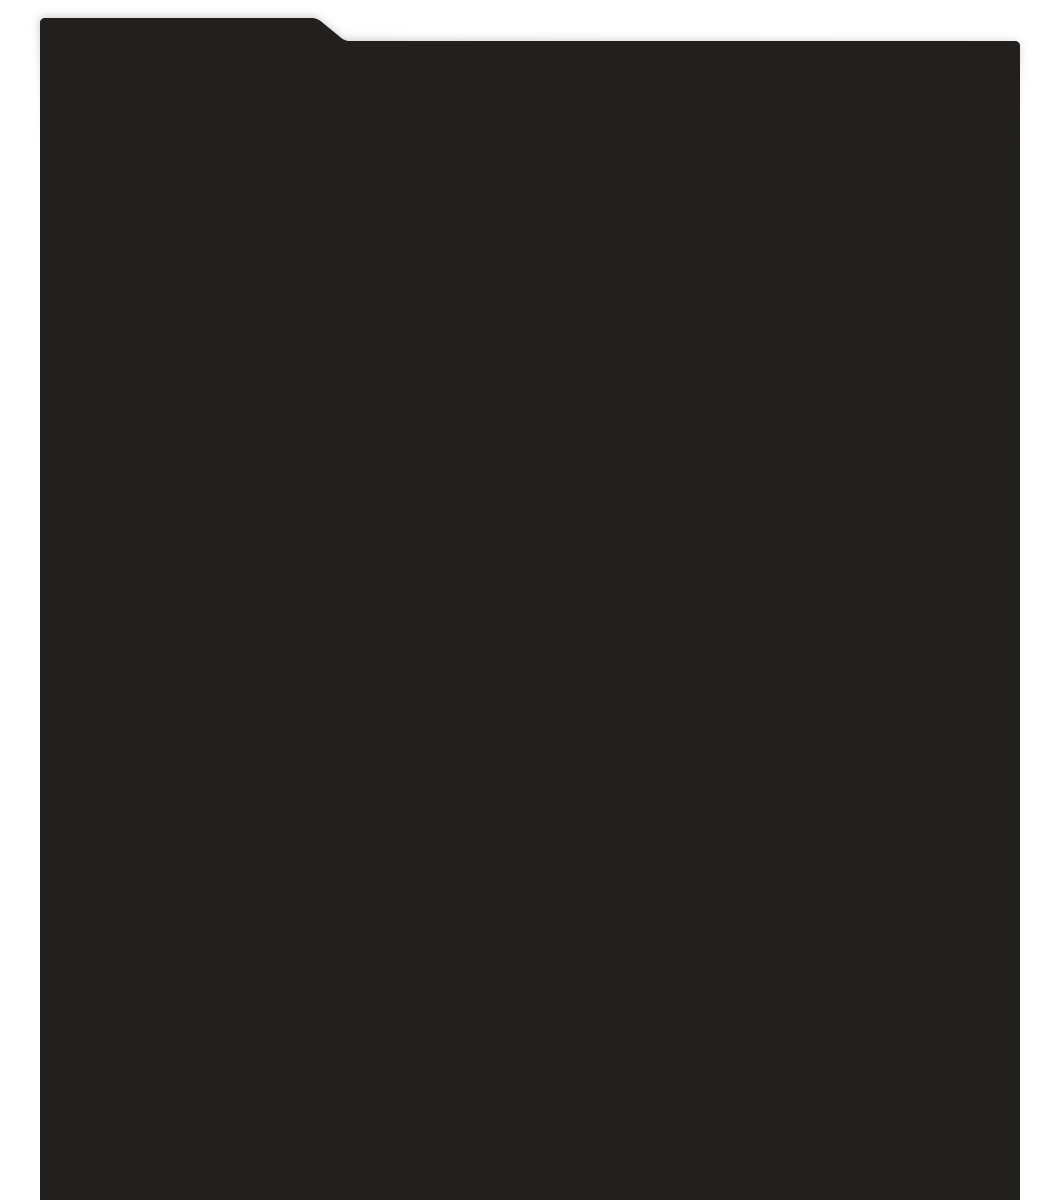
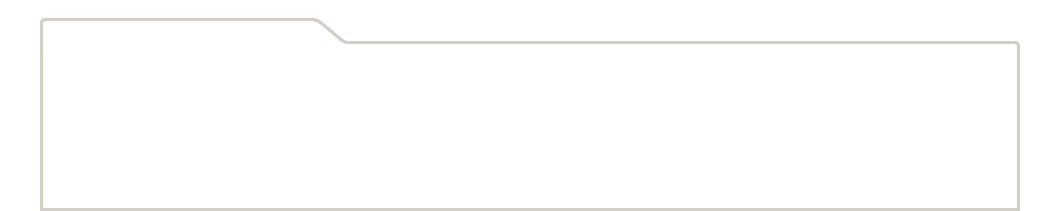
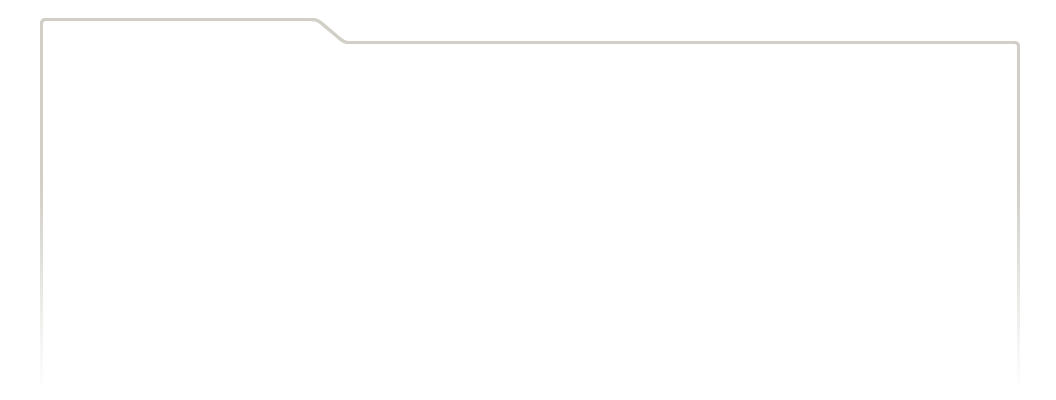
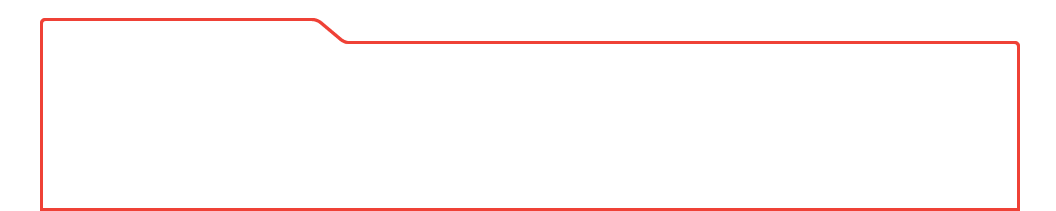
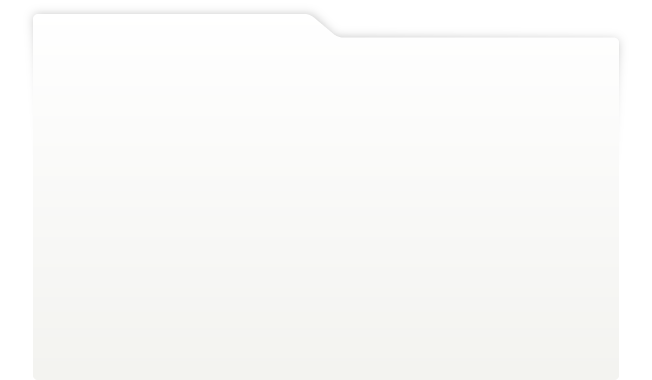
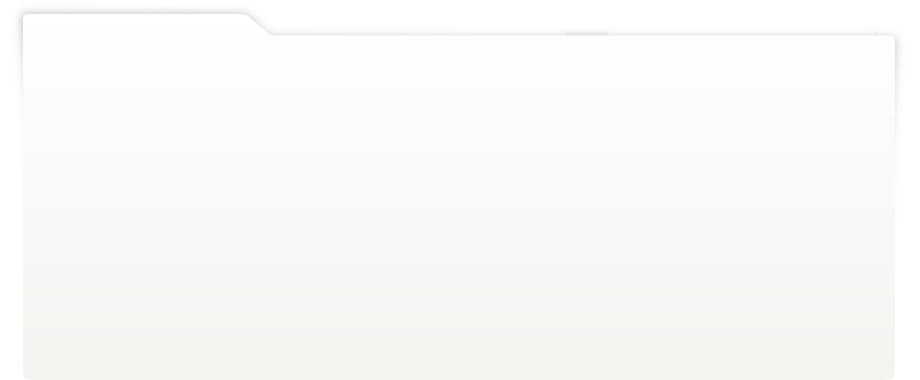
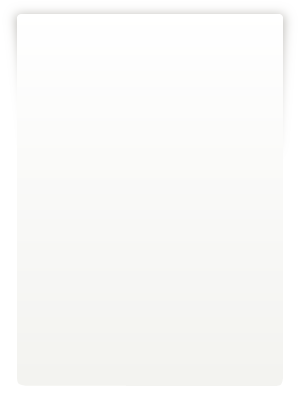
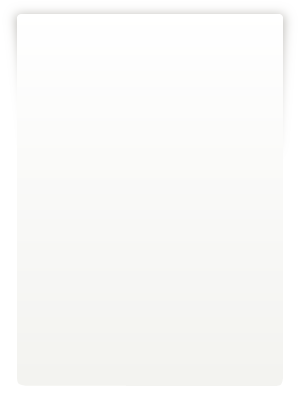
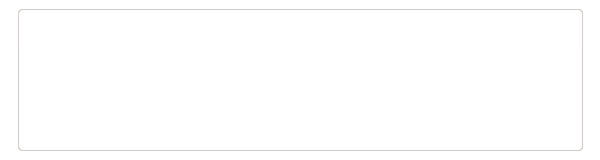
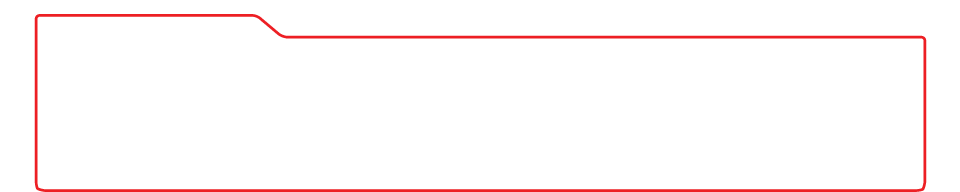
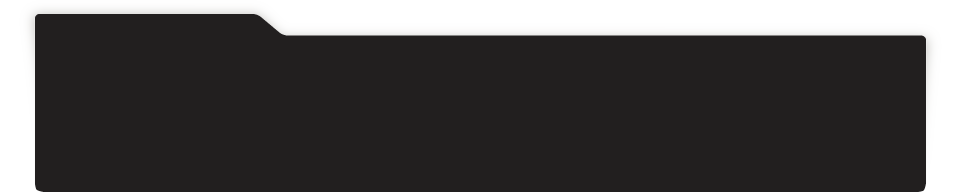
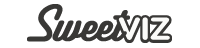
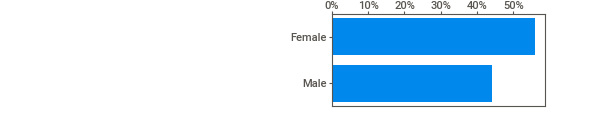
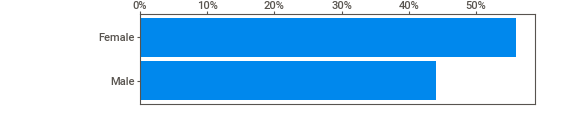
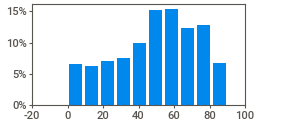
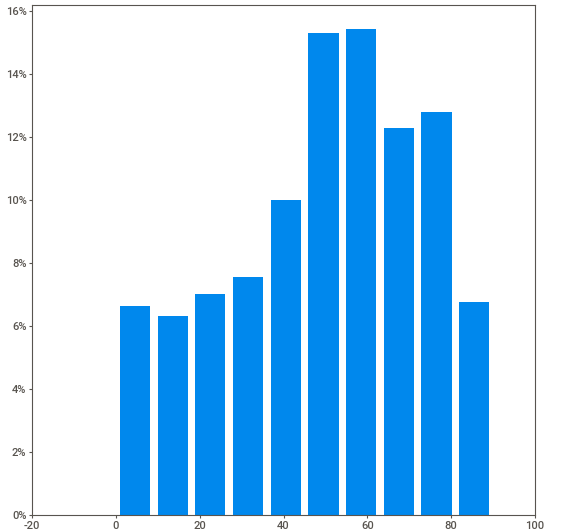
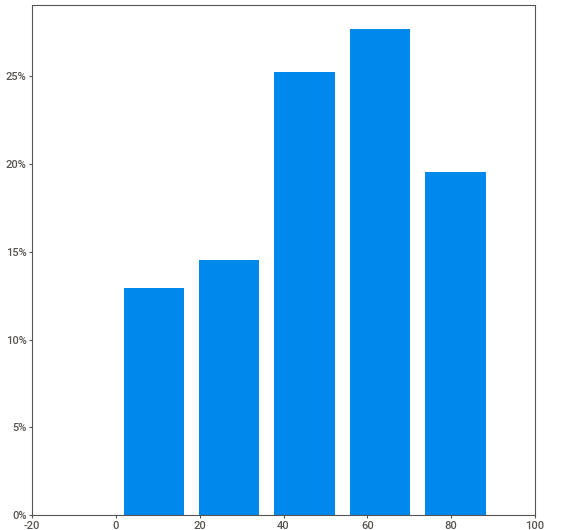
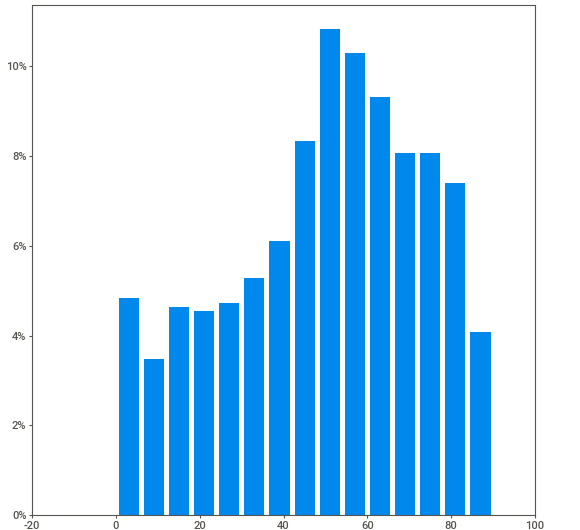
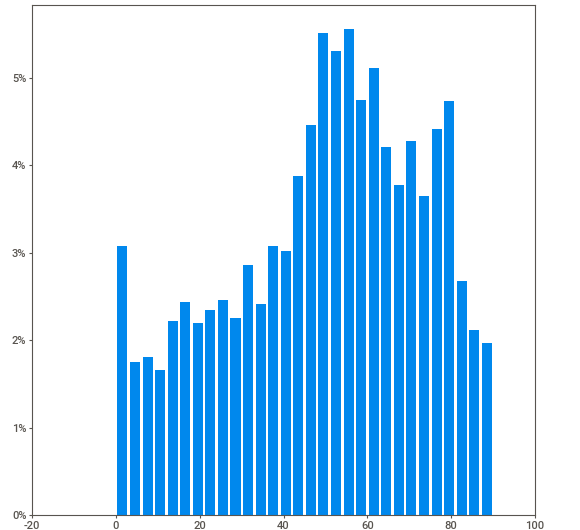
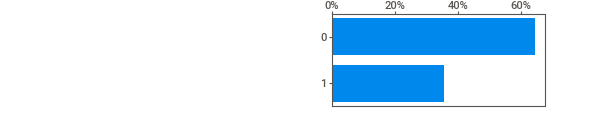
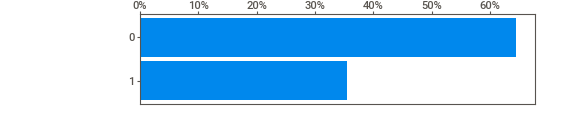
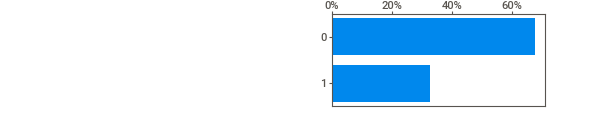
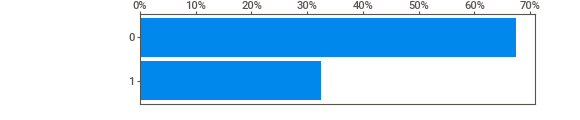
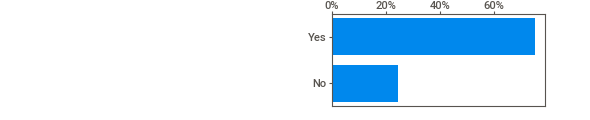
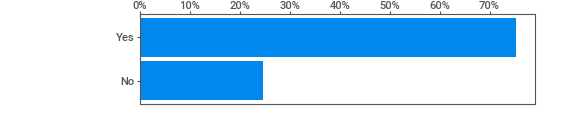
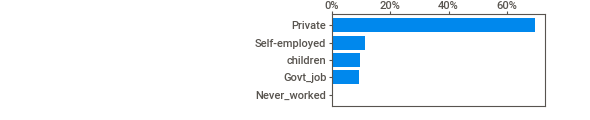
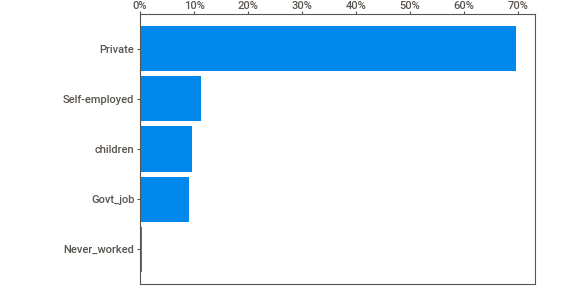
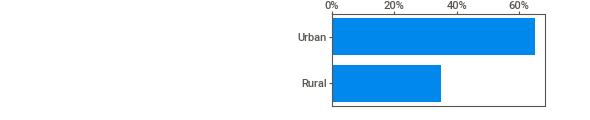
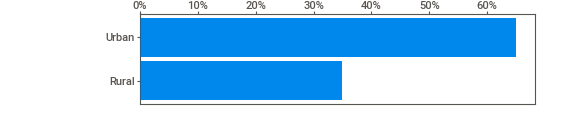
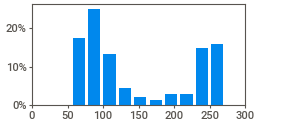
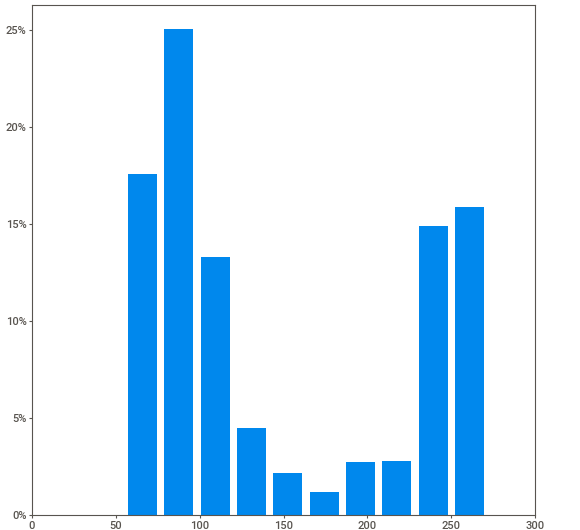
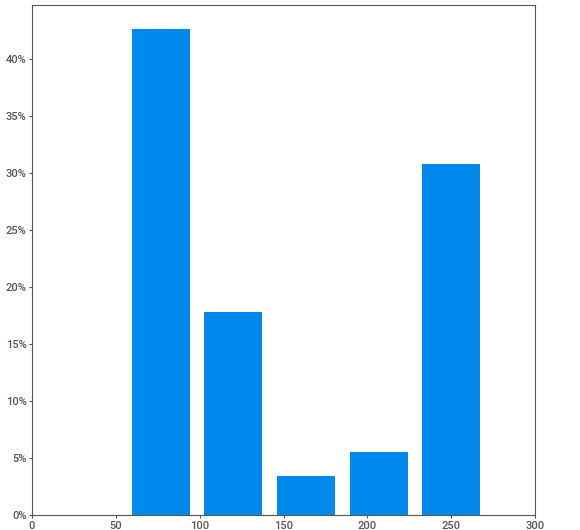
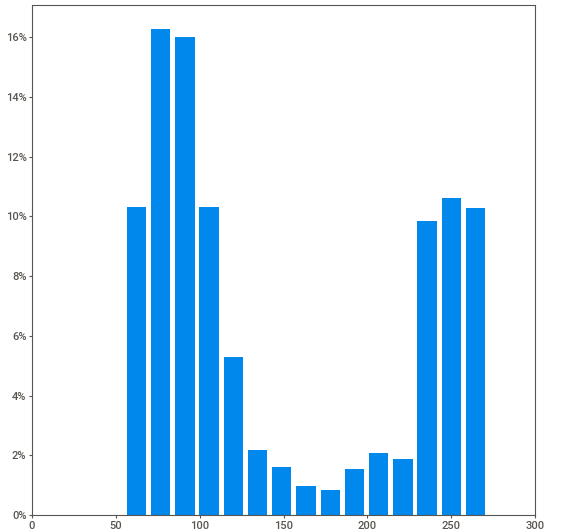
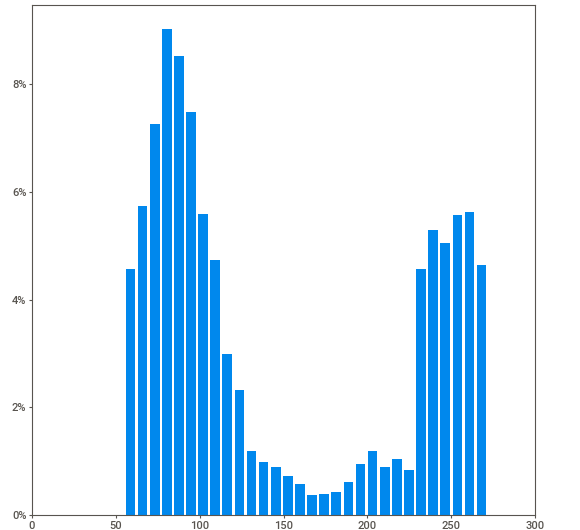
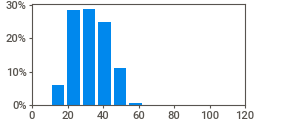
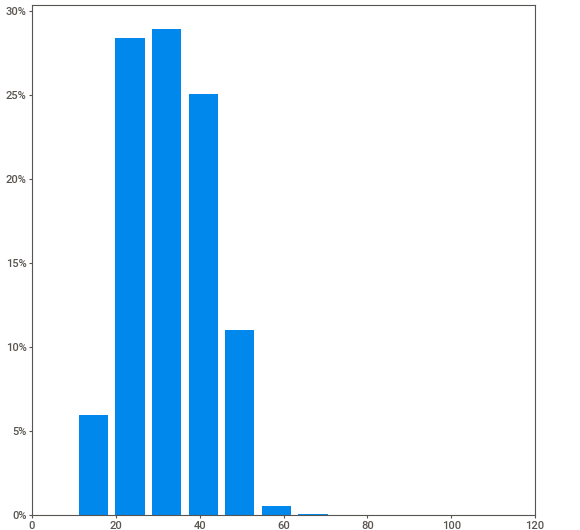
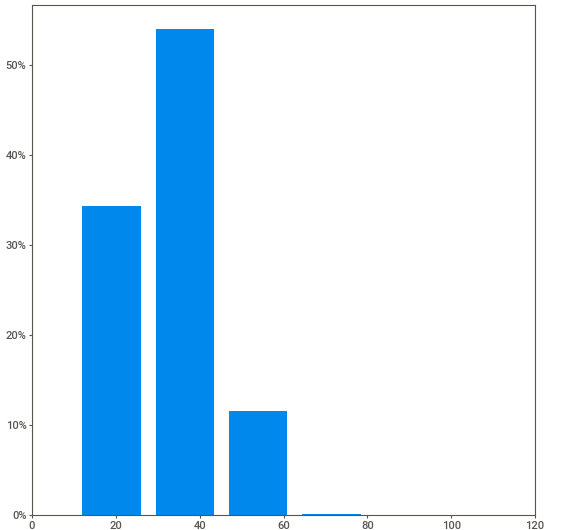
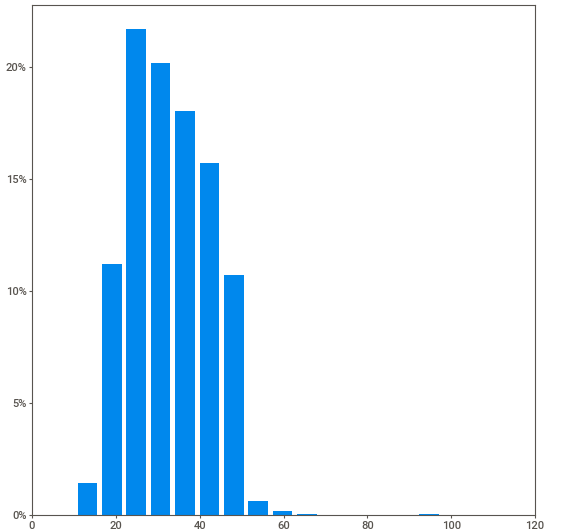
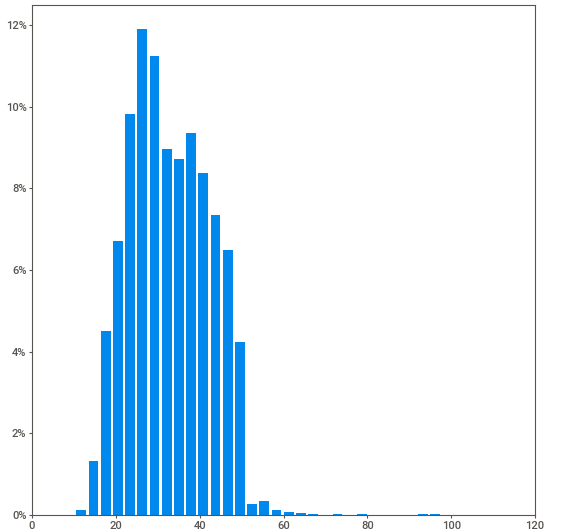
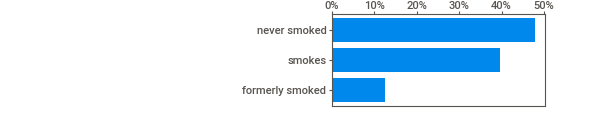
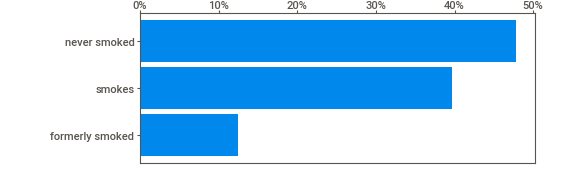
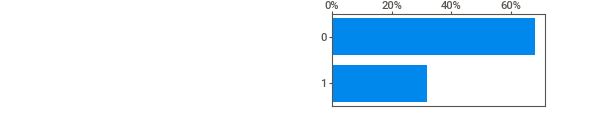
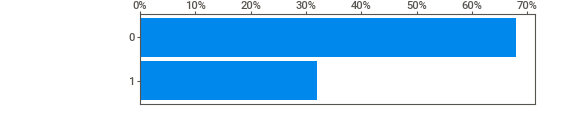
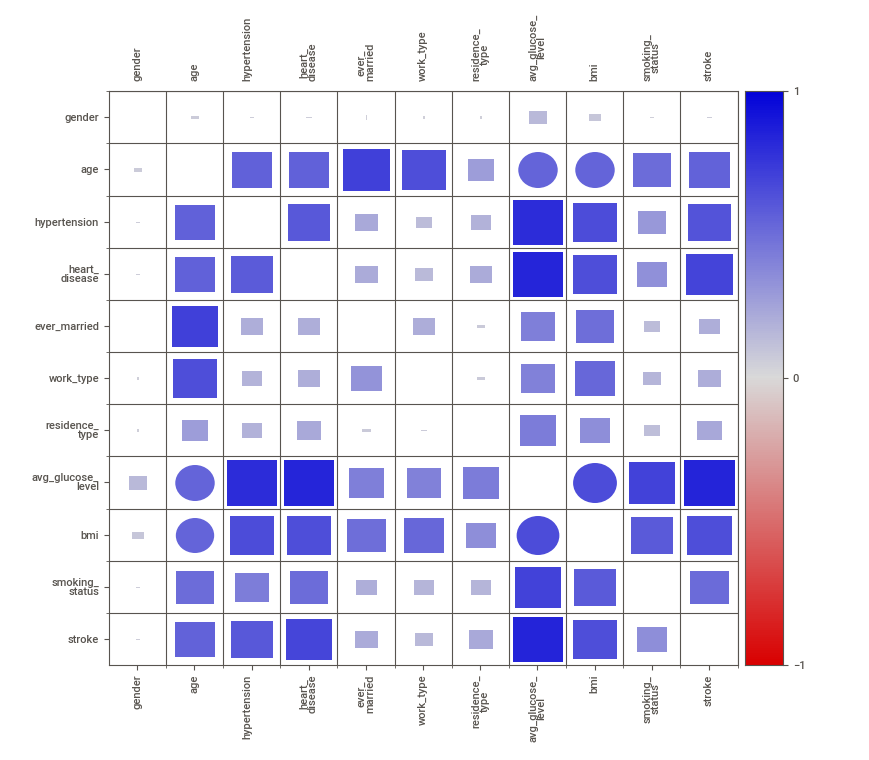
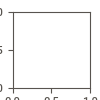

In [15]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_notebook()

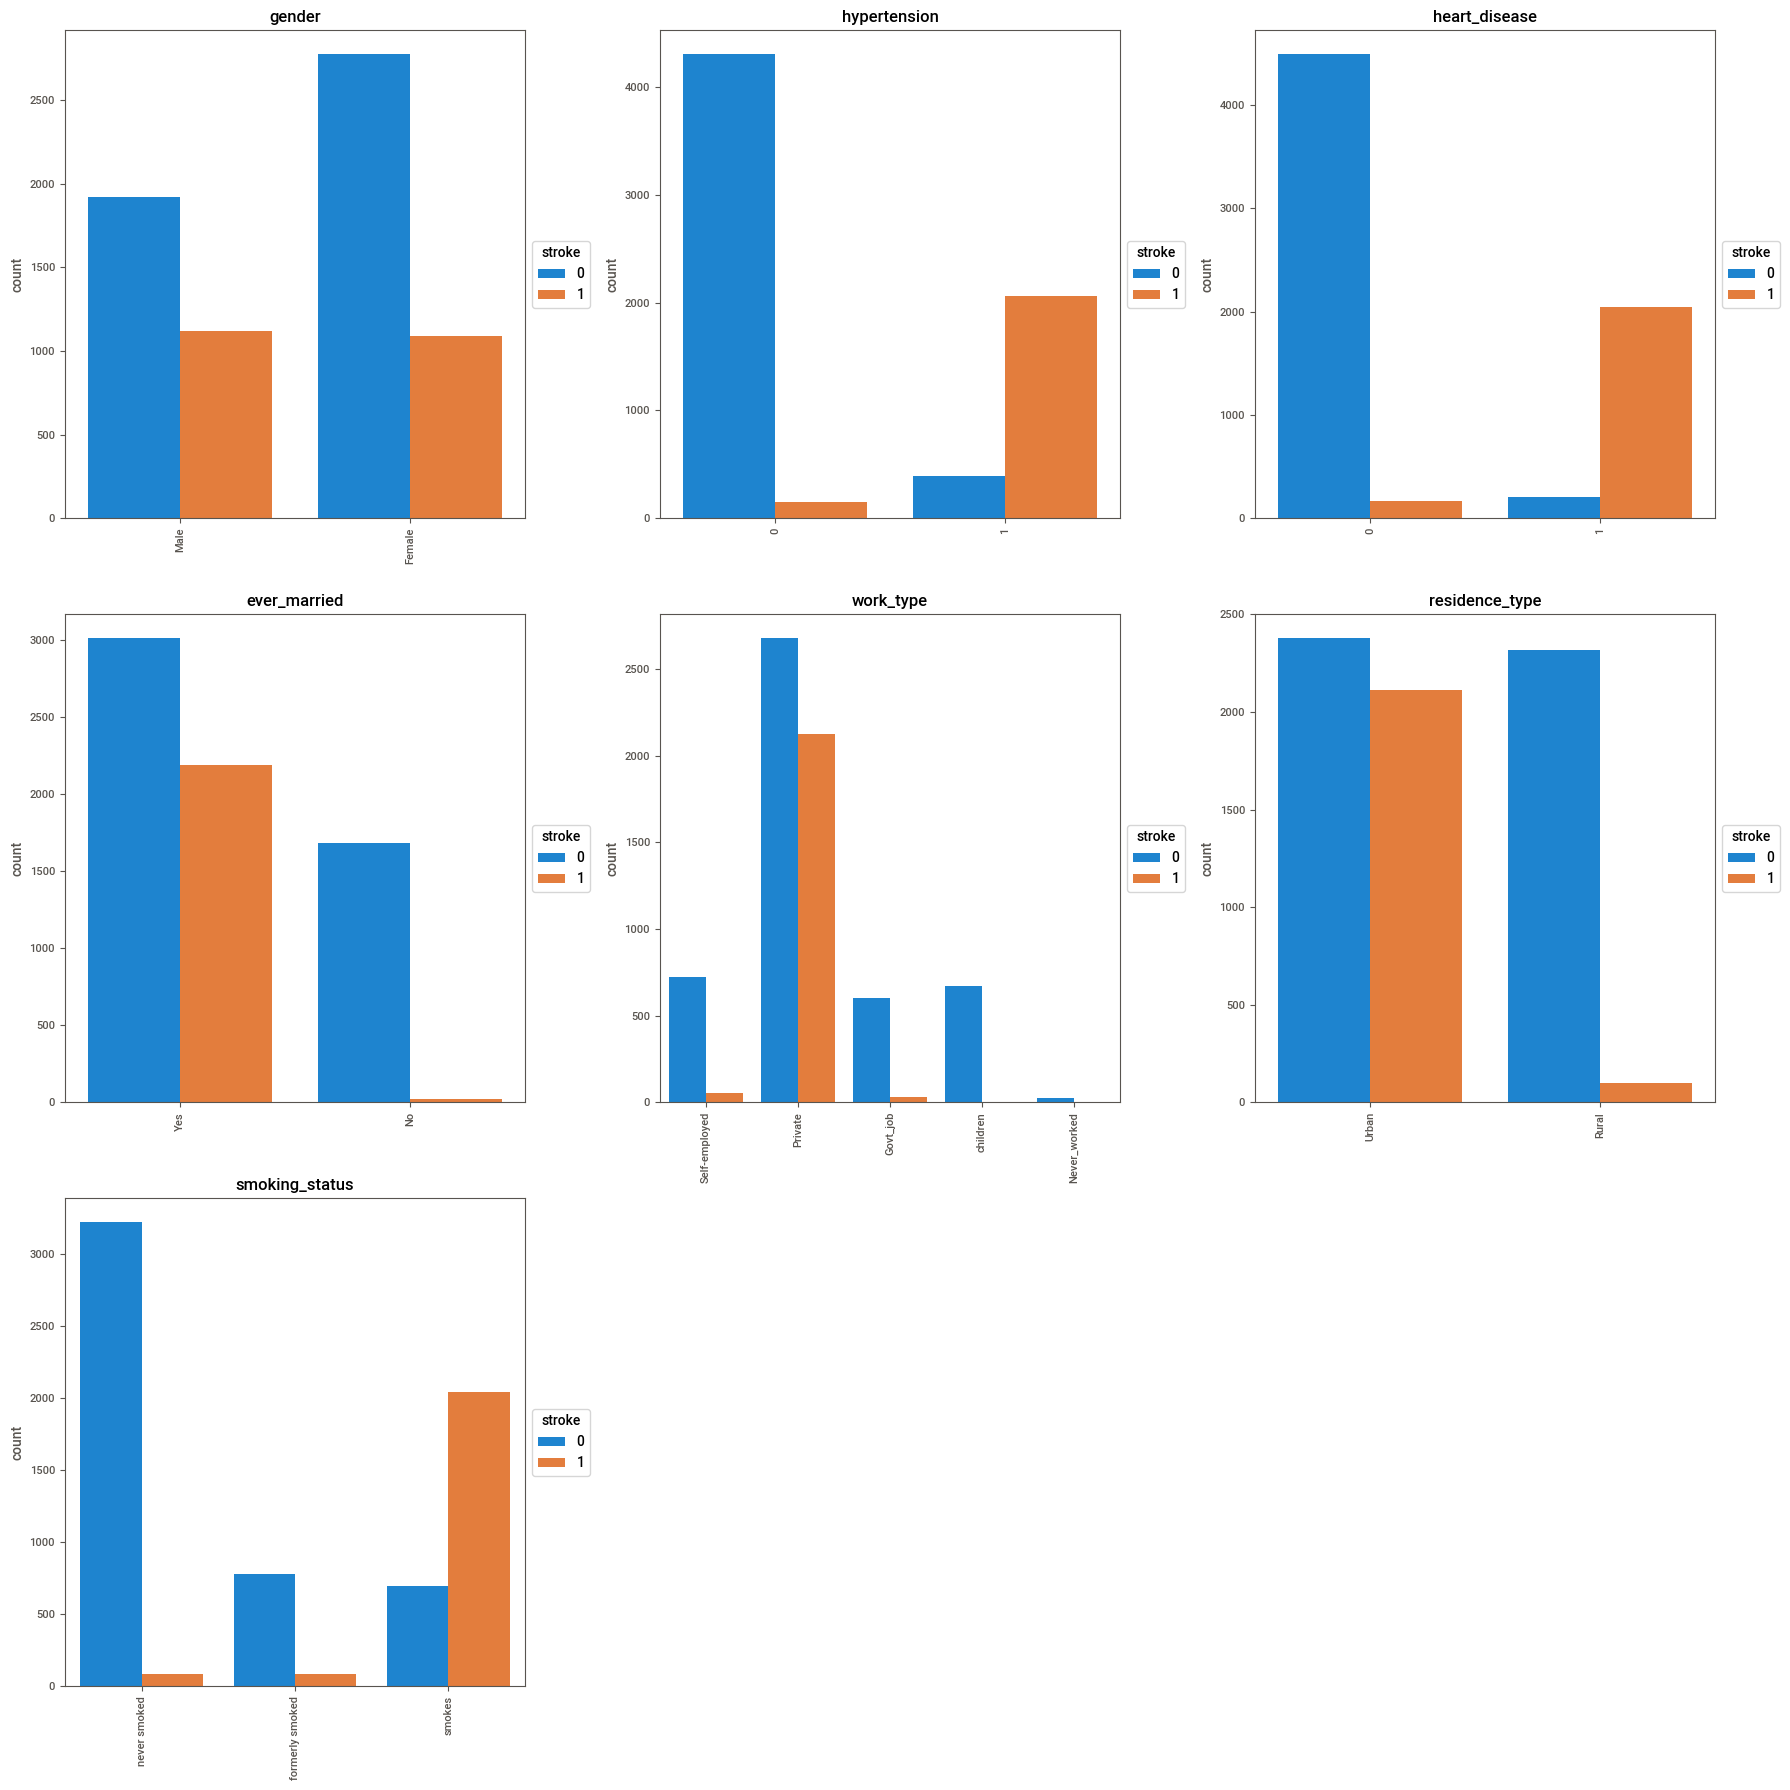

In [16]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=df, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  
axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

En estas gráficas de barras podemos observar los valores representativos de cada una de las columnas contenidas en el conjunto de datos, donde realizamos una comparación entre cada uno de los valores contenidos en cada columna, segmentándolos por la columna stroke (Accidente Cerebrovascular), con la finalidad de identificar posibles características que nos ayuden a entender que personas son más propensas a tener un accidente cerebrovascular.

###**Distribución de las Caracteristicas Númericas Continuas**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


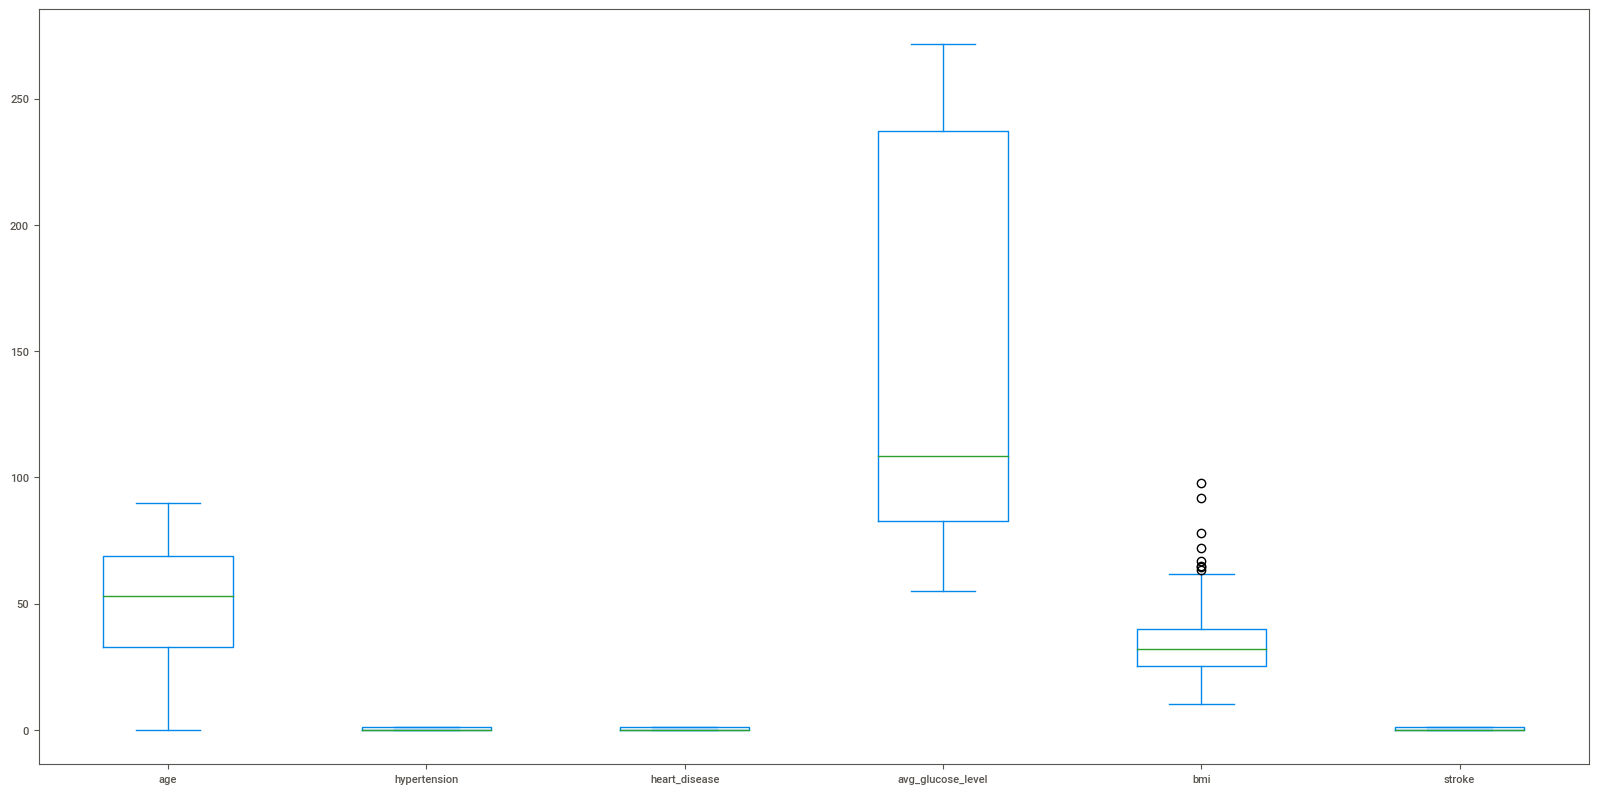

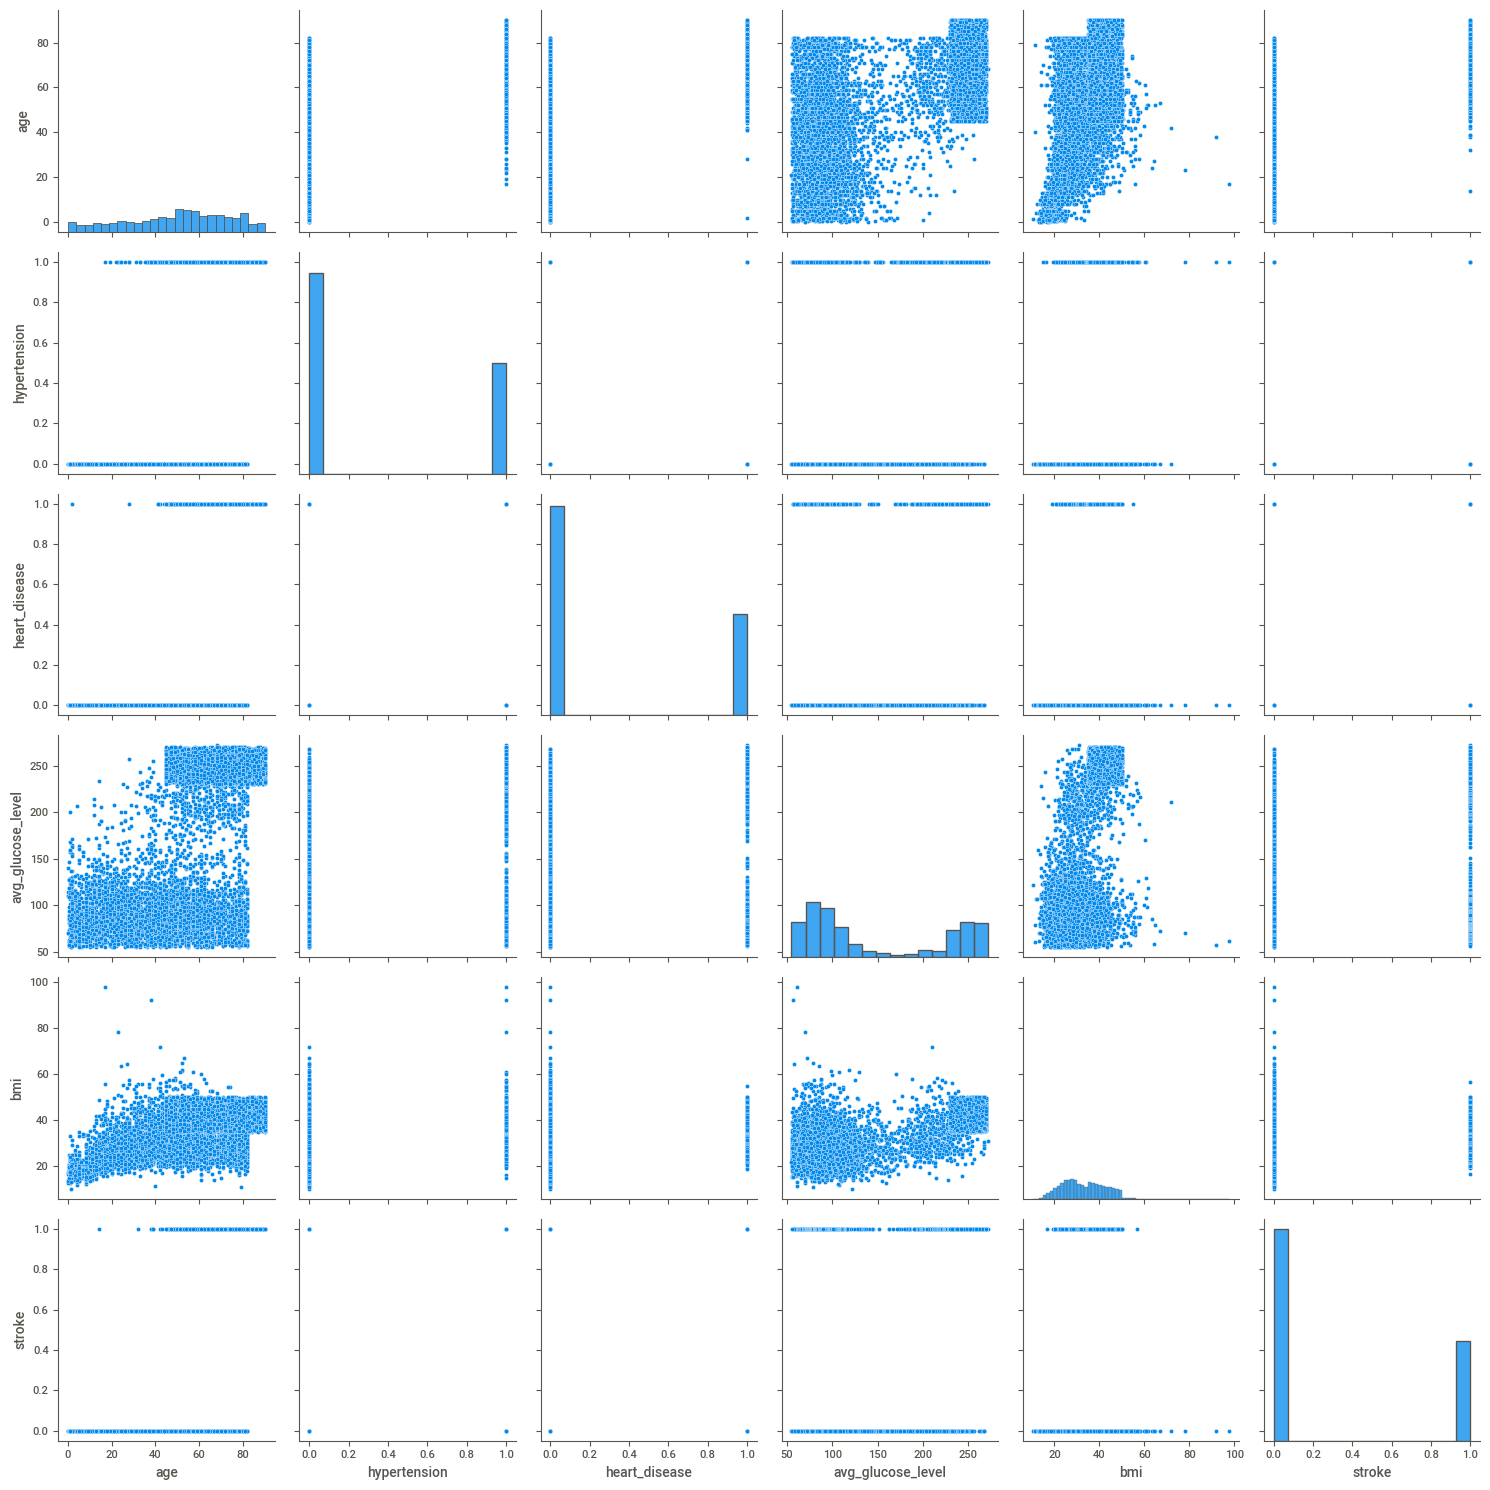

In [17]:
df.plot.box(figsize=(20,10))
# Calculate and show pairplot
sns.pairplot(df, size=2.5)
plt.tight_layout()

En este diagrama de caja de bigotes se puede observar la distribución de los valores que se encuentran contenidos en cada una de las variables númericas del conjunto de datos. Asi mismo podemos observar posibles outliers que se evidencian en variables como heart_disease (enfermedad cardiaca) y el bmi (indice de masa muscular).

###**Detección de Anomalías (Outliers)**

In [20]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1° Cuartil
        Q1 = np.percentile(df[c],25)
        # 3° Cuartil
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Datos Atipicos (Outlier)
        outlier_step = IQR * 1.5
        # Dettección de outlier y sus índices en el conjunto de datos
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Almacenar índices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [21]:
df.loc[detect_outliers(df,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


###**Eliminación de Anomalías (Outliers)**

In [22]:
df = df.drop(detect_outliers(df,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)
print(df.count())

gender               6910
age                  6910
hypertension         6910
heart_disease        6910
ever_married         6910
work_type            6910
residence_type       6910
avg_glucose_level    6910
bmi                  6910
smoking_status       6910
stroke               6910
dtype: int64


###**Codificación Caracteristicas Categoricas**


La codificación de etiquetas es una técnica de codificación para manejar variables categóricas. En esta técnica, a cada dato se le asigna un número entero único.

In [23]:
objList = df.select_dtypes(include = "object").columns

le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910 entries, 0 to 6909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             6910 non-null   int64  
 1   age                6910 non-null   float64
 2   hypertension       6910 non-null   int64  
 3   heart_disease      6910 non-null   int64  
 4   ever_married       6910 non-null   int64  
 5   work_type          6910 non-null   int64  
 6   residence_type     6910 non-null   int64  
 7   avg_glucose_level  6910 non-null   float64
 8   bmi                6910 non-null   float64
 9   smoking_status     6910 non-null   int64  
 10  stroke             6910 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 594.0 KB
None


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,81.0,0,0,1,3,1,99.33,33.7,1,1
1,1,74.0,0,0,1,2,1,98.55,25.6,0,1
2,0,79.0,1,0,0,0,1,98.02,22.3,0,1
3,0,72.0,0,0,1,2,0,97.92,26.9,2,1
4,0,39.0,0,0,1,3,1,97.76,29.6,2,1


---


---
#<center> **Modelo de Clasificación en Conjunto de Datos**</center>
---


---


###**División de Datos de Entrenamiento (Train) y Prueba (Test)**

In [24]:
#Obteniendo los campos de entrada (input)
data_X = df.drop('stroke', axis=1)

#Obteniendo el campo de salida (output)
data_y = df['stroke']

Utilizamos el parámetro de estratificación (stratify) para asegurarnos de que la proporción de la variable objetivo en el entrenamiento y el subconjunto de pruebas esté equilibrada.

In [25]:
#Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=42, stratify=data_y)

print(f'Total de muestras en todo el conjunto de datos: {len(data_X)}')
print(f'Total de muestras en el conjunto de datos de entrenamiento: {len(X_train)}')
print(f'Total de muestras en el conjunto de datos de prueba: {len(X_test)}')

Total de muestras en todo el conjunto de datos: 6910
Total de muestras en el conjunto de datos de entrenamiento: 5182
Total de muestras en el conjunto de datos de prueba: 1728


###**Escalado de Características**

Al escalar, estamos eliminando el sesgo potencial que el modelo puede tener hacia características con magnitudes más altas.

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###**Evaluando Modelos**

Realizaremos una evaluación entre los diferentes algoritmos de clasificación que nos permita derterminar cual sera el mejor modelo para trabajar con este conjunto de datos (Accidentes Cerebrovasculares)

In [29]:
#from https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring =['accuracy',
  'balanced_accuracy',
  'top_k_accuracy',
  'average_precision',
  'neg_brier_score',
  'f1',
  'f1_micro',
  'f1_macro',
  'f1_weighted',
  'f1_samples',
  'neg_log_loss',
  'precision',
  'precision_micro',
  'precision_macro',
  'precision_weighted',
  'precision_samples' 
  'recall',
  'recall_micro',
  'recall_macro',
  'recall_weighted',
  'recall_samples' 
  'jaccard',
  'jaccard_micro',
  'jaccard_macro',
  'jaccard_weighted',
  'jaccard_samples' 
  'roc_auc',
  'roc_auc_ovr',
  'roc_auc_ovo',
  'roc_auc_ovr_weighted',
  'roc_auc_ovo_weighted']

names=['naive bayes','decision tree','logistic','SVM','randomForest','----']
models=[sklearn.naive_bayes.GaussianNB(),
                DecisionTreeClassifier(random_state=0),
                LogisticRegression(),
                SVC(C=1,kernel='linear'),
                RandomForestClassifier()]

for reg,name in zip(models,names):
    scores = cross_val_score(reg, X_train, y_train.ravel(), scoring=scoring[6], cv=10)
    print('--------------------------------------')
    print('model {0:20} | score {1:20}'.format(name,scoring[6]))
    print(scores)
    print('mean {0:22.2f}| std   {1:<22.2f}'.format(scores.mean(),scores.std()))
    print("Accuracy(95.7%): {0:10.2f} (+/- {1:.2f})" .format(scores.mean(), scores.std() * 2))

--------------------------------------
model naive bayes          | score f1_micro            
[0.97109827 0.95761079 0.97297297 0.94208494 0.98648649 0.96525097
 0.95752896 0.94208494 0.96138996 0.95366795]
mean                   0.96| std   0.01                  
Accuracy(95.7%):       0.96 (+/- 0.03)
--------------------------------------
model decision tree        | score f1_micro            
[0.93641618 0.93256262 0.96525097 0.94015444 0.95752896 0.94015444
 0.94208494 0.93243243 0.95173745 0.92664093]
mean                   0.94| std   0.01                  
Accuracy(95.7%):       0.94 (+/- 0.02)
--------------------------------------
model logistic             | score f1_micro            
[0.96339114 0.9672447  0.97490347 0.93822394 0.97683398 0.96138996
 0.95945946 0.94015444 0.96138996 0.95366795]
mean                   0.96| std   0.01                  
Accuracy(95.7%):       0.96 (+/- 0.02)
--------------------------------------
model SVM                  | score f1_micro   

###**Entrenamiento modelo de Clasificación Random Forest**

Entrenamiento del modelo Random Forest en el conjunto de datos de entrenamiento

In [32]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Aplicamos la estrategia *k-Fold Cross Validation* que nos permitirá ver si estamos ante un problema de sobreajuste (overfitting) y también ver la calidad de nuestro modelo. Por lo tanto, nos permitirá probar el rendimiento de nuestro modelo antes de encontrar altas tasas de error en el conjunto de datos de prueba que aún no hemos visto.

In [33]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.80 %
Standard Deviation: 1.00 %


###**Matriz de Confusión**

In [34]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not Stroke', 1:'Stroke'}, index={0:'Not Stroke', 1:'Stroke'}, inplace=True)
df_cm

#print(accuracy_score(y_test, y_pred))

,Not Stroke,Stroke
Not Stroke,1169,6
Stroke,49,504


###**Reporte Clasificación**

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1175
           1       0.99      0.91      0.95       553

    accuracy                           0.97      1728
   macro avg       0.97      0.95      0.96      1728
weighted avg       0.97      0.97      0.97      1728



###**Predicción del Modelo**


In [36]:
y_pred=classifier.predict(X_test)

In [37]:
df1=pd.DataFrame({'Truth':y_test,'Predicted':y_pred,'Difference':(y_test-y_pred)})
df1.sample(100)

,Truth,Predicted,Difference
2942,0,0,0
5630,1,1,0
5959,1,1,0
6050,1,1,0
2471,0,0,0
...,...,...,...
437,0,0,0
5609,1,1,0
38,1,0,1
5307,1,1,0


###**Intentar Predecir**

In [38]:
def prediction(feat_value):
    scaled = sc.transform(feat_value)
    return classifier.predict(feat_value)

**Escenario No.1**

*   Gender: Male (1)
*   Age: 65
*   Hypertension: True (1)
*   Heart_disease: True (1)
*   Ever_married: True (1)
*   Work_type: Self-employed (3)
*   Residence_type: Urban (1)
*   Avg_glucose_level: 200
*   Bmi: 68
*   Smoking_status: Smoke (1)



In [39]:
prediction([[1, 65, 1, 1, 1, 3, 1, 200, 68, 1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([1])

**Escenario No.2**

*   Gender: Female (0)
*   Age: 40
*   Hypertension: False (0)
*   Heart_disease: False (0)
*   Ever_married: True (1)
*   Work_type: Govt_job (0)
*   Residence_type: Rural  (0)
*   Avg_glucose_level: 160
*   Bmi: 60
*   Smoking_status: Never_smoked (0)


In [40]:
prediction([[0, 40, 0, 0, 1, 0, 0, 160, 60, 0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

Terminamos obteniendo la salida 0 (alto riesgo) para el escenario 1 y la salida 1 (bajo riesgo) para el escenario 2.

###**Columnas Importantes del Modelo Para Predicción**

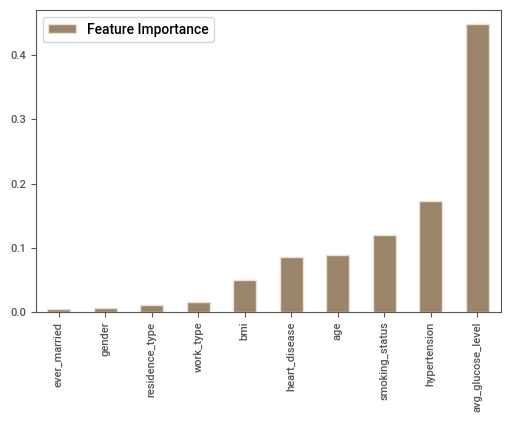

In [41]:
palettes = ['#9B856A', '#475962', '#598392', '#124559', '#540B0E']
pd.DataFrame(classifier.feature_importances_, index=data_X.columns, columns=['Feature Importance']).sort_values(by='Feature Importance').plot.bar(color=palettes, edgecolor='#EAE0D5')

Para este conjunto de datos en particular, avg_glucose_level, hypertension, smoking_status y age son las características más importantes para determinar si alguien tiene un riesgo alto o bajo de sufrir un accidente cerebrovascular. Cuanto mayor sea el nivel de glucosa en la sangre, mayor será el riesgo de sufrir un derrame cerebral y, del mismo modo, las personas mayores.

###**Conclusión**

En este trabajo, construimos un modelo de aprendizaje automático para predecir si alguien tiene un alto riesgo de sufrir un accidente cerebrovascular o no. Decidimos utilizar Random Forest Classifier como nuestro modelo final, ya que tiene una puntuación F equilibrada alta (score f1-micro) y también una buena puntuación de exactitud (Accuracy), en comparación a los demás algoritmos evaluados. A partir del análisis que hicimos anteriormente de nuestro modelo, el nivel de glucosa en el cuerpo, la hipertensión, si es o no fumador y la edad tienen el papel principal para determinar la salida de nuestro modelo.

---


---
#<center> **Preguntas Ejercicio de Calsificación**</center>
---


---


**¿Cuáles serían las mejores variables de entrada para hacer clasificación y por qué?**

\
A partir del análisis que hicimos de nuestro modelo de aprendizaje supervisado construido, el nivel de glucosa en el cuerpo, la hipertensión, si es o no fumador y la edad tienen el papel principal para determinar la salida de nuestro modelo. En este caso utilizamos una función del algoritmo Random Forest **classifier.feature_importances_**, para definir qué características (variables de entrada) eran las más relevantes en nuestro modelo para tener mayor efectividad de predicción al recibir nuevos datos.

\
**¿Qué otras fuentes de información utilizarían para para mejorar la predicción realizada?**

\
Para mejorar la predicción realizada en la construcción de este modelo utilizaríamos fuentes de información como:

*   Kaggle
*   Google datasets
*   Amazon datasets
*   Microsoft datasets
*   UCI – Machine Learning Repository
*   Bases de datos de compañías hospitalarias que nos brinden información relacionada a los accidentes cerebrovasculares.

\
**¿Qué transformaciones requiere realizar sobre los datos?**


*   Imputar registros que contengan valores vacíos
*   Eliminación de columnas o campos innecesarios
*   Estandarización de nombre de columnas
*   Distribución de valores desconocidos (para no imputarlos)
*   Codificación de variables categóricas

\
**¿Qué método sería el más conveniente? ¿Por qué?**

\
Decidimos utilizar el algoritmo de clasificación **Random Forest** como nuestro modelo final, ya que tiene una puntuación F equilibrada alta (score f1-micro) y también una buena puntuación de exactitud (Accuracy), en comparación a los demás algoritmos evaluados.

\
**¿Cuál es el mejor indicador de desempeño del clasificador de acuerdo a la lógica del negocio?**

\
Sin duda alguna la puntuación de valor F (f1-score) ya que nos permite combinar las medidas de precision y recall en un sólo valor. Esto es práctico para nuestro caso porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

\
**¿Alguna implicación ética sobre las decisiones que estaría tomando este clasificador?**

\
Al ser un conjunto de datos pequeño y al no conocer el origen real de donde proviene la información, es posible que el algoritmo construido tenga alguna implicación ética sobre las decisiones que estaría tomando este clasificador, como las siguientes:

*   Sesgos en los datos lo que podría conllevar al modelo a predecir información incoherentemente.
*   Ampliación en la fuente de datos para que el modelo pueda ser entrenado con más datos y así mismo sea eficaz al momento de la prueba, evaluación y posteriormente la predicción.
*   Preprocesamiento adecuada de la información contenida en el conjunto de datos para cada una de las variables, con el objetivo de construir un buen modelo que permita tomar decisiones coherentes sobre nuevos datos ingeridos.

\
**¿Qué técnicas de visualización o muestra de resultados aplicaría?**

\
Aquí utilizamos técnicas de visualización como:

*   **Diagrama de Barras:** Para visualizar descriptivamente los valores contenidos en las variables de entrada y de salida así mismo para realizar una comparación entre cada uno de los valores contenidos en cada columna, segmentándolos por la columna stroke (Accidente Cerebrovascular), con la finalidad de identificar posibles características que nos ayuden a entender que personas son más propensas a tener un accidente cerebrovascular.
*   **Caja de Bigotes:** Para visualizar posibles outliers (valores atípicos o inusuales) que nos permita identificar y representar un valor distante con respecto al resto de los datos contenidos en las diferentes variables del conjunto de datos.

\
**¿Cuáles fueron los hiperparametros del modelo y porque los selecciono?**

\
Los hiperparametros empleados en este modelo fueron los siguientes:

*   **n_estimators:** Utilizamos este hiperparámetro ya que nos permite controlar el número de árboles dentro del clasificador.
*   **random_state:** Utilizamos este hiperparámetro para establecer la semilla para el generador aleatorio y así poder asegurarnos de que los resultados que obtengamos se puedan reproducir.
*   **stratify:** Utilizamos el hiperparámetro de estratificación para asegurarnos de que la proporción de la variable objetivo en el entrenamiento y el subconjunto de pruebas esté equilibrada.
*   **criterion:** Utilizamos este hiperparámetro para medir la calidad de una división. En este caso definimos el valor de "entropía" para la ganancia de información.
*   **scoring:** Utilizamos este hiperparámetro para tomar una cadena (en este caso f1_micro) que indica la métrica a optimizar. La métrica debe maximizarse, lo que significa que mejores modelos dan como resultado puntuaciones más altas. Para la clasificación en nuestro caso, esto puede ser exactitud.
*   **cv (Cross-Validation):** Usamos el hiperparámetro de validación cruzada ya que nos permite dividir la gran masa de (entrenamiento + validación) en conjuntos de entrenamiento y validación repetidamente, para tener mejoras en el modelo (entrenamiento y predicción).
